#### Problema 1: El departamento de marketing de una empresa registró durante 100 meses la inversión en publicidad digital (en miles de dólares) y las unidades vendidas. Necesitan cuantificar cómo afecta el gasto en publicidad a las ventas para optimizar su presupuesto.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats

#### Importar y procesar los datos históricos

In [3]:
df=pd.read_csv('PublicidadVentas.csv')
print(df.head())
print(df.describe())
print(df.info())

   Inversion  Ventas
0        1.2     180
1        1.5     210
2        1.8     250
3        2.0     280
4        2.2     300
       Inversion       Ventas
count  70.000000    70.000000
mean    9.880000   908.000000
std     5.093605   410.071044
min     1.200000   180.000000
25%     5.575000   565.000000
50%     9.900000   910.000000
75%    14.150000  1255.000000
max    18.500000  1600.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inversion  70 non-null     float64
 1   Ventas     70 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 KB
None


#### Ajustar un modelo de regresión lineal que relacione inversión con ventas

In [4]:
X=df[["Inversion"]].values
y=df["Ventas"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)
md=LinearRegression()
md.fit(X_train,y_train)

LinearRegression()

#### Evaluar la calidad del modelo mediante MSE y R²

In [5]:
y_predic=md.predict(X_test)
mse=mean_squared_error(y_test,y_predic)
r2=r2_score(y_test,y_predic)

#### Visualizar la relación con un gráfico profesional con ejes etiquetados

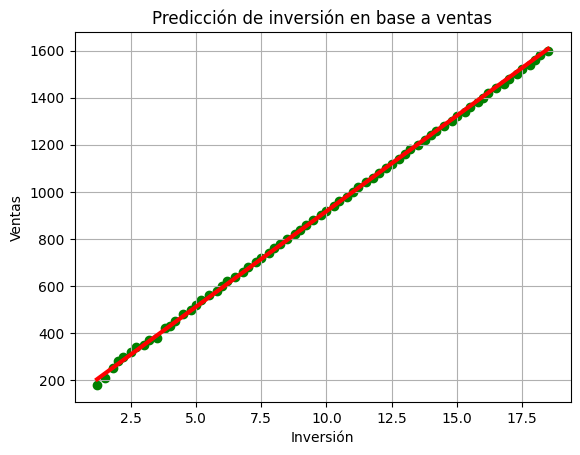

In [13]:
plt.title("Predicción de inversión en base a ventas")
plt.scatter(X,y,color='Green')
plt.plot(X,md.predict(X),color='red',linewidth=3)
plt.grid()
plt.xlabel("Inversión")
plt.ylabel("Ventas")
plt.show()

#### Implementar una función para estimar ventas esperadas según posible inversión

In [8]:
def estimacion():
    inversion=[[]]
    ventas_estimadas=md.predict(inversion)
    return ventas_estimadas[0]


#### Mostrar la ecuación del modelo en el gráfico

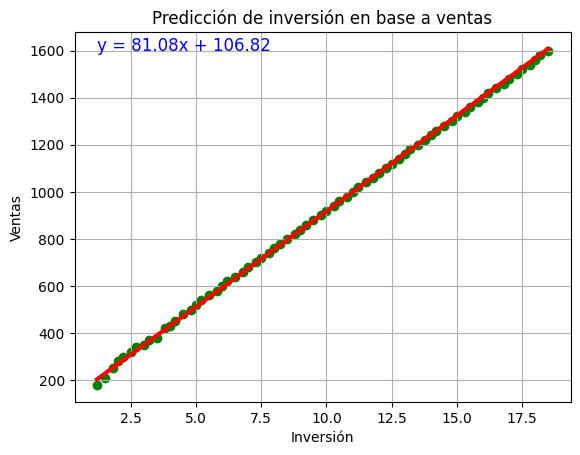

In [14]:
plt.title("Predicción de inversión en base a ventas")
plt.scatter(X,y,color='Green')
plt.plot(X,md.predict(X),color='red',linewidth=3)
plt.grid()
plt.xlabel("Inversión")
plt.ylabel("Ventas")
plt.text(min(X), max(y), f"y = {md.coef_[0]:.2f}x + {md.intercept_:.2f}", fontsize=12, color='blue')
plt.show()